In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [8]:
df.shape

(18885, 12)

In [9]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [10]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [11]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [12]:
#Published Airline IATA Code null fields removed
df_bool = pd.notnull(df["Published Airline IATA Code"])
df=df[df_bool]

In [13]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

In [14]:
df.sample(5)

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Month,Activity Year
17808,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,6211,11,2017
18413,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Enplaned,Other,International,G,7956,4,2018
7858,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,13486,2,2011
2076,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,35595,1,2007
9302,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,G,9781,3,2012


In [15]:
df.shape

(18822, 13)

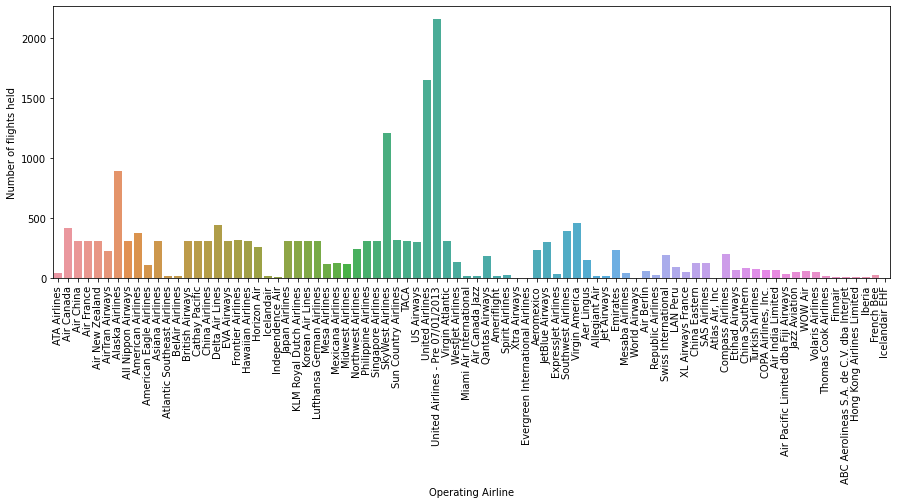

In [17]:
plt.figure(figsize=(15,5))
sns.countplot("Operating Airline",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of flights held");

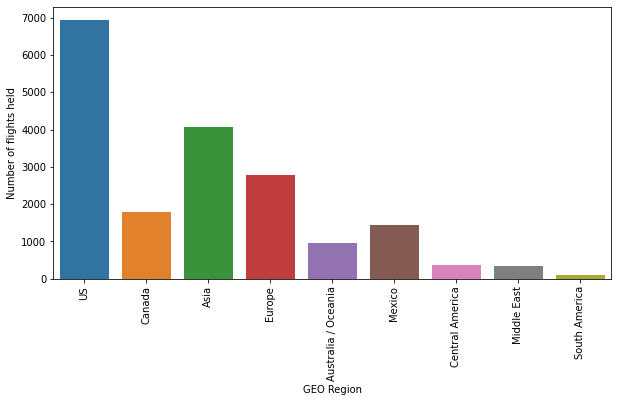

In [18]:
plt.figure(figsize=(10,5))
sns.countplot("GEO Region",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of flights held");

In [19]:
airline_count = df["Operating Airline"].value_counts()

In [20]:
airline_passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

In [21]:
list_group=pd.DataFrame(airline_passenger_count)
list_group.head(10)

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235
US Airways,16816616


In [22]:
airline_count

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
World Airways                          3
Icelandair EHF                         2
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Name: Operating Airline, Length: 84, dtype: int64

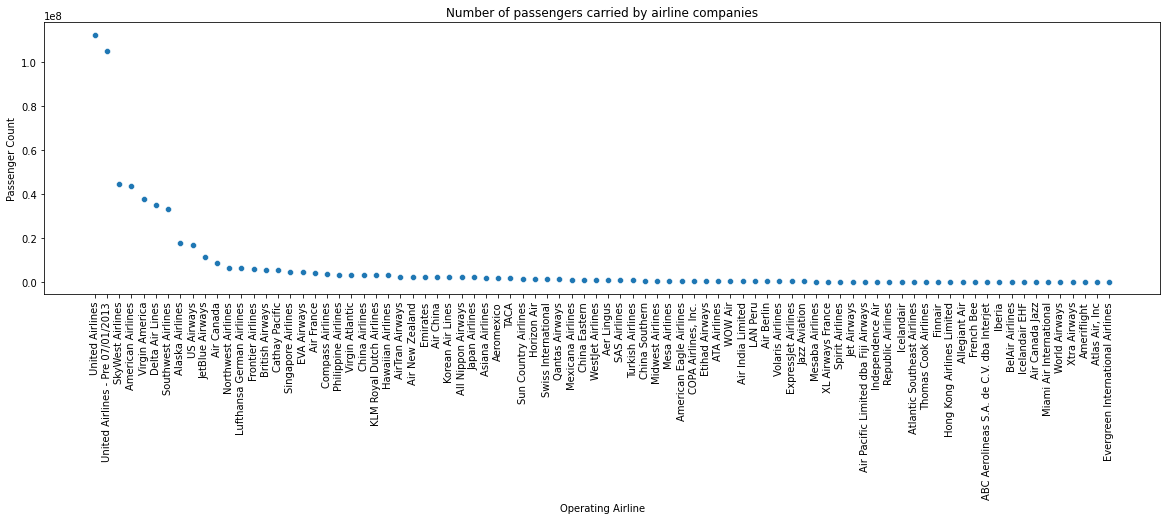

In [24]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Number of passengers carried by airline companies");

In [25]:
airline_passenger_count_of_year=df.groupby(df["Activity Year"]).sum()["Passenger Count"].sort_values(ascending=False)

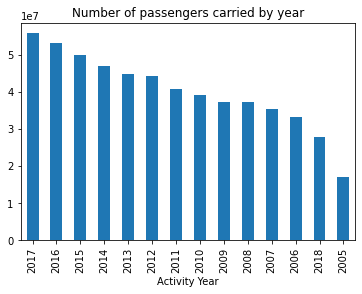

In [26]:
airline_passenger_count_of_year.plot.bar()
plt.title("Number of passengers carried by year");

In [27]:
x=pd.get_dummies(df,drop_first=True)

In [28]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i)
        K.fit(x)
        predict_kmeans=K.predict(x)
        score=silhouette_score(x,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}") 

In [29]:
cluster(15)

cluster=2, score=0.8593932399348594
cluster=3, score=0.828382486917623
cluster=4, score=0.7862465053066837
cluster=5, score=0.7844844300731962
cluster=6, score=0.6616371270456082
cluster=7, score=0.662081674597681
cluster=8, score=0.6500662133188252
cluster=9, score=0.6409845858644199
cluster=10, score=0.6149921864110253
cluster=11, score=0.6116849250893955
cluster=12, score=0.6113202832359752
cluster=13, score=0.532424122238602
cluster=14, score=0.5325812950195644


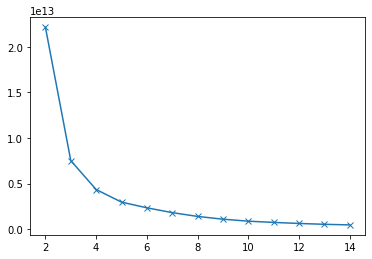

In [30]:
plt.plot(all_clusters,sum_of_squared_distances,marker="x");

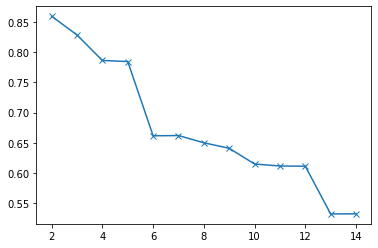

In [31]:
plt.plot(all_clusters,all_score,marker="x");    
# A decrease was observed in the 5th cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


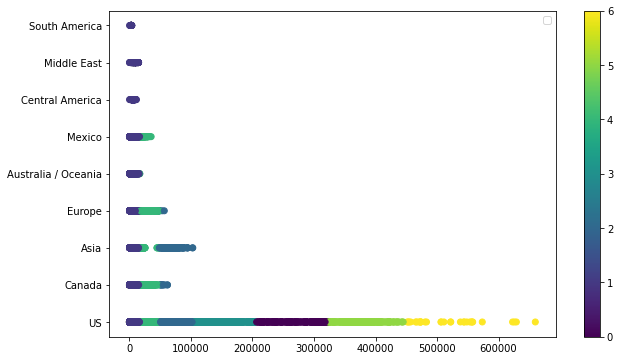

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df["Passenger Count"],y=df["GEO Region"],c=predicts[5])
plt.legend()
plt.colorbar()
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


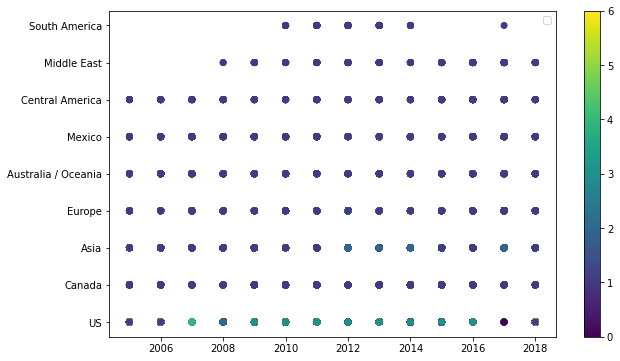

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df["Activity Year"],y=df["GEO Region"],c=predicts[5])
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


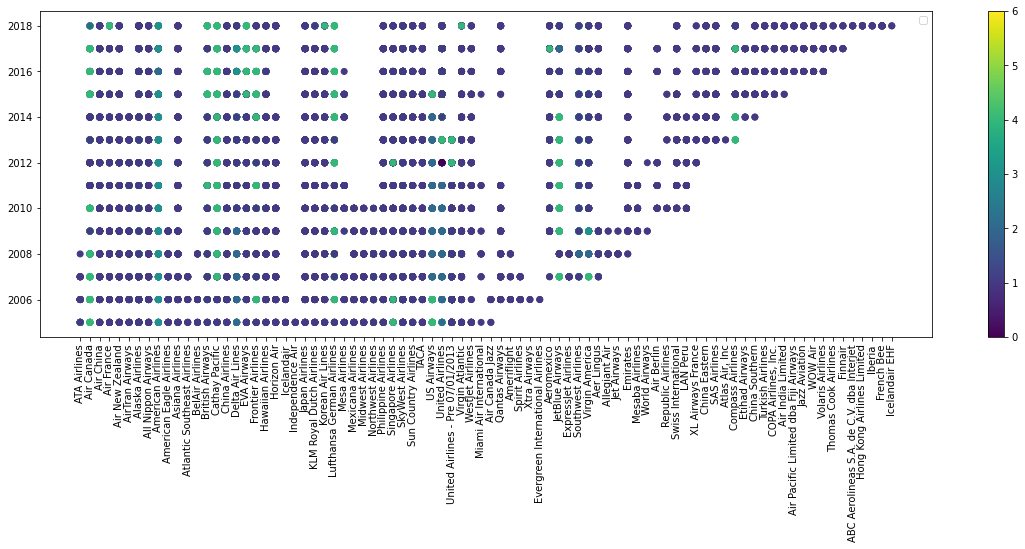

In [37]:
plt.figure(figsize=(20,6))
plt.scatter(y=df["Activity Year"],x=df["Operating Airline"],c=predicts[5])
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


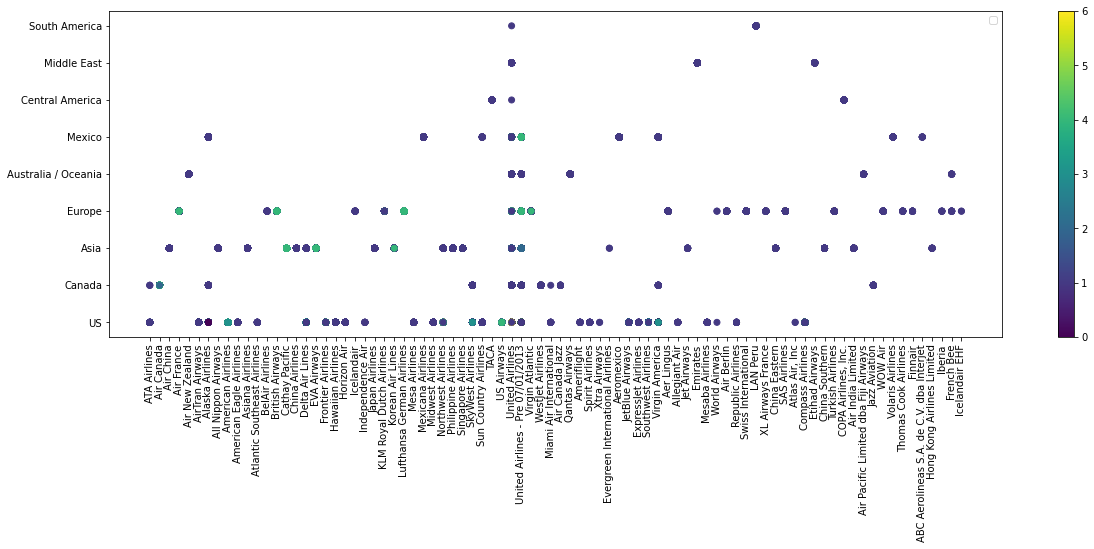

In [38]:
plt.figure(figsize=(20,6))
plt.scatter(x=df["Operating Airline"],y=df["GEO Region"],c=predicts[5])
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show()